In [59]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [60]:
filename = os.path.join(os.getcwd(), "data", "airbnbData_Prepared.csv")
df = pd.read_csv(filename)

# Inspect data
print(df.shape)
print(df.columns)
print(df.hed(10))

In [65]:
# Define label as host_is_superhost
df['host_is_superhost']

0        False
1        False
2        False
3        False
4        False
         ...  
28017    False
28018    False
28019     True
28020     True
28021    False
Name: host_is_superhost, Length: 28022, dtype: bool

In [66]:
# Identify features
list(df.loc[:, df.columns != 'host_is_superhost'])

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_ro

In [67]:
# One hot encode data
from sklearn.preprocessing import OneHotEncoder

to_encode = df.select_dtypes(include='object').columns.tolist()
to_encode

{col: df[col].nunique() for col in to_encode}

enc = OneHotEncoder(sparse=False)
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]))

df_enc.head()

['neighbourhood_group_cleansed', 'room_type']

In [71]:
df_enc.columns = enc.get_feature_names(to_encode)
df_enc.head(10)
df.drop(columns=to_encode, inplace=True)
df = df.join(df_enc)
print(df.columns)

In [76]:
# Assign labels
y = df['host_is_superhost']
X = df.drop(columns='host_is_superhost')

In [77]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:49
['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [80]:
# Train a Decision Tree classifier on training data and calculate accuracy score
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf = leaf)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test, prediction)
    
    return score
    

In [81]:
# Train two decision trees and evaluate performance
the_depth = [8, 32]
for value in the_depth:
    print (value, train_test_DT(X_train, X_test, y_train, y_test, depth=value, leaf=1, crit='entropy'))

8 0.833044982698962
32 0.8070934256055363


In [82]:
def visualize_accuracy(hyperparameters, accuracy_scores):
    sns.lineplot(x=hyperparameters, y=accuracy_scores, marker='o', label="Model accuracy")
    plt.xlabel('Hyperparameter Values')
    plt.ylabel('Accuracy Scores')
    plt.show()

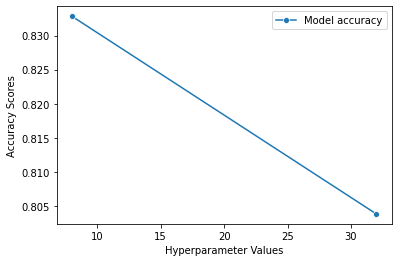

In [83]:
visualize_accuracy(the_depth, [0.8328287197231834,0.8038494809688581])

From this graph, we can infer that a lower depth of the tree will produce a higher performing model compared to a higher depth tree. This is most likely due to overfitting as the depth of the tree increases. However, we would need to test more values for max depth in order to be able to gauge what exactly would be the best value which produces the highest performance. 

In [84]:
# Train more trees and evaluate performance
the_depth = [1,2,3,8,16,32]
accuracy = []
for value in the_depth:
    accuracy.append(train_test_DT(X_train, X_test, y_train, y_test, depth=value, leaf=1, crit='entropy'))
    print (value, train_test_DT(X_train, X_test, y_train, y_test, depth=value, leaf=1, crit='entropy'))

1 0.7563797577854672
2 0.7563797577854672
3 0.8099048442906575
8 0.8331531141868512
16 0.8116349480968859
32 0.8057958477508651


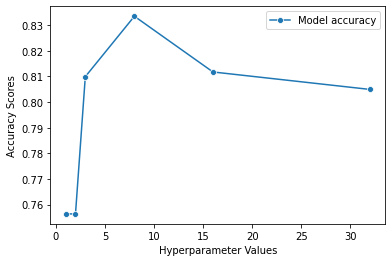

In [85]:
visualize_accuracy(the_depth, accuracy)

From this plot it is clear that 8 holds the higest model accuracy as the values of max depth which are lower are likely underfit to the data and the values higher are likely overfit to the data. It also would be helpful to tune the min_samples_leaf hyperparameter. We could figure out the perfect medium for min_samples_leaf since the lower the values are, the more susceptible the model is to overfitting and the higher the values are, the more susceptible the model is to underfitting.

In [86]:
# Train a KNN Classifer and compute accuracy
def train_test_knn(X_train, X_test, y_train, y_test, k):
    
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test, prediction)
    
    return score

In [87]:
# Train three KNN classifers and evaluate performance
k = [3,30,300]
accuracy = []
for k_val in k:
    score = train_test_knn(X_train, X_test, y_train, y_test, k_val)
    accuracy.append(score)
    print(k_val, score)

3 0.759515570934256
30 0.7755190311418685
300 0.7696799307958477


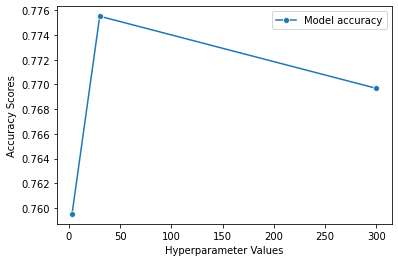

In [88]:
visualize_accuracy(k, accuracy)

In [89]:
# Make more values of k to train model on
k_range = np.arange(1, 40, step = 3) 
k_range

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

In [93]:
k = k_range
accuracy = []
for k_val in k:
    score = train_test_knn(X_train, X_test, y_train, y_test, k_val)
    accuracy.append(score)
    print(k_val, score)

1 0.7454584775086506
4 0.77530276816609
7 0.7654628027681661
10 0.7743295847750865
13 0.7730320069204152
16 0.7763840830449827
19 0.7754108996539792
22 0.776924740484429
25 0.77530276816609
28 0.7741133217993079
31 0.7756271626297578
34 0.7763840830449827
37 0.7749783737024222


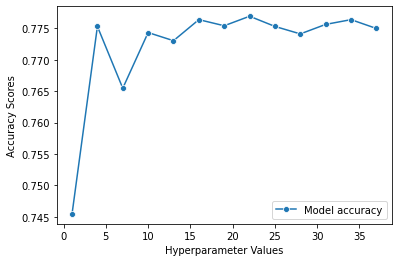

In [94]:
visualize_accuracy(k, accuracy)

In [106]:
leaf_vals = [1,5,10,15,20,23,25,27,30,35]
accuracy = []
for val in leaf_vals:
    acc = train_test_DT(X_train, X_test, y_train, y_test, depth=8, leaf=val, crit='entropy')
    accuracy.append(acc)
    print(val, acc)

1 0.8333693771626297
5 0.8318555363321799
10 0.8327205882352942
15 0.8331531141868512
20 0.832288062283737
23 0.8326124567474048
25 0.8340181660899654
27 0.8325043252595156
30 0.8323961937716263
35 0.8315311418685121


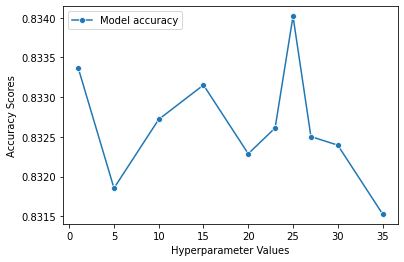

In [107]:
visualize_accuracy(leaf_vals, accuracy)

In [102]:
def train_test_knn2(X_train, X_test, y_train, y_test, k, metric):
    
    model=KNeighborsClassifier(n_neighbors=k, metric=metric)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test, prediction)
    
    return score

In [104]:
metrics = ['euclidean', 'manhattan','chebyshev', 'minkowski']
accuracy = []
for dist in metrics:
    score = train_test_knn2(X_train, X_test, y_train, y_test, k=22, metric=dist)
    accuracy.append(score)
    print(dist+ " : " +str(score))

euclidean : 0.776924740484429
manhattan : 0.779628027681661
chebyshev : 0.7750865051903114
minkowski : 0.776924740484429


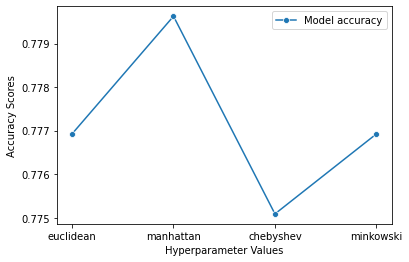

In [105]:
visualize_accuracy(metrics, accuracy)

1. When tuning the KNN model's hyperparameter of k and the Decision Tree model's hyperparameter of max_depth, the model which performed the best was the decision tree with a max depth of 8, yielding an ~83.3% accuracy. This was nearly 6% more than the best performing KNN model with a k value of 22 and an accuracy percentage of ~77.7%. 
2. When considering other hyperparameters for KNN and decision trees which were the distance function and min samples leaf, respectively, the result did not have as much of a drastic difference as tuning the first hyperparameters. The most accurate models were determined to be: for KNN, using a k value of 22 and the manhattan distance metric reached an accuracy of ~78.0%. For decision trees, a max depth of 8 and min sample leaf of 25 reached ~83.4% accuracy. Even though the improved difference is not large, even just a slight increase in accuracy could make a large difference in real time implementation.